Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [ ]:
# loading the data from csv file to Pandas DataFrame
big_mart_data = pd.read_csv('/content/Train.csv')

In [ ]:
# first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [ ]:
# getting some information about thye dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Making a Copy of Original Data
data =big_mart_data.copy()

In [ ]:
#Lowering the down column names
data.columns = data.columns.str.lower()

In [ ]:
#Calculating Missing Values
(data.isnull().sum()/len(data))*100

item_identifier               0.000000
item_weight                  17.165317
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                  28.276428
outlet_location_type          0.000000
outlet_type                   0.000000
item_outlet_sales             0.000000
dtype: float64

# **Handling Missing Values**
Imputation Of Missing Values in the Columns:

In [ ]:
group_mean_weight = data.pivot_table(index = ["item_type"], values = "item_weight", aggfunc = [np.mean])

In [ ]:
group_mean_weight

,mean
,item_weight
item_type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328


In [ ]:
mean_weight = group_mean_weight.iloc[:,[0][0]]

In [ ]:
mean_weight

item_type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: (mean, item_weight), dtype: float64

In [ ]:
# Function to impute Missing Value in item_weight column:

def missing_value(cols):
    item_type = cols[0]
    item_weight =cols[1]
    if pd.isnull(item_weight):
        if item_type == "Baking Goods":
            return 12.277
        elif item_type == "Breads":
            return 11.347
        elif item_type == "Breakfast":
            return 12.768
        elif item_type == "Canned":
            return 12.30
        elif item_type == "Dairy":
            return 13.42
        elif item_type == "Frozen Foods":
            return  12.867061
        elif item_type == "Fruits and Vegetables":
            return 13.224769
        elif item_type == "Hard Drinks":
            return 11.400328
        elif item_type == "Health and Hygiene":
            return 13.142314
        elif item_type == "Household":
            return 13.384736
        elif item_type == "Meat":
            return 12.817344
        elif item_type == "Others":
            return 13.853285
        elif item_type == "Seafood":
            return 12.552843
        elif item_type == "Snack Foods":
            return 12.987880
        elif item_type == "Soft Drinks":
            return 11.847460
        elif item_type == "Starchy Foods":
            return 13.690731
    return item_weight 

In [ ]:
#Imputing the missing value by using defined function
data["item_weight"] = data[["item_type","item_weight"]].apply(missing_value, axis = 1)

In [ ]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Data Analysis Through Visualization**


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

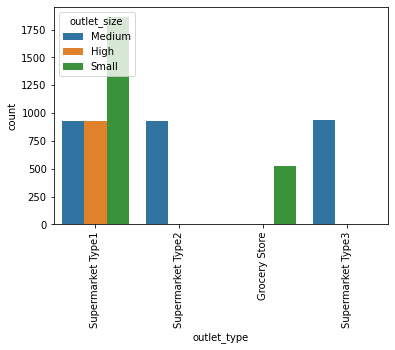

In [ ]:
#FINDING FREQUENCY COUNT OF OUTLET TYPE
sns.countplot(data = data, x = "outlet_type",hue = "outlet_size")
plt.xticks(rotation =90)

In [ ]:
# Function for Imputing Missing value in Outlet_Size column:

def impute_size(cols):
    size = cols[0]
    ot_type = cols[1]
    if pd.isnull(size):
        if ot_type == "Supermarket Type1":
            return "Small"
        elif ot_type == "Supermarket Type2":
            return "Medium"
        elif ot_type == "Grocery Store":
            return "Small"
        elif ot_type == "Supermarket Type3":
            return "Medium"
    return size    
    

In [ ]:
#USING ABOVE DEFINED FUNCTION IMPUTE MISSING VALUES IN OUTLET SIZE COLUMNS
data["outlet_size"] = data[["outlet_size","outlet_type"]].apply(impute_size, axis = 1)

In [ ]:
data["item_fat_content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
data["item_fat_content"] = data["item_fat_content"].str.replace("LF", "low fat").str.replace("reg", "regular").str.lower()

In [ ]:
data["item_fat_content"].unique()

array(['low fat', 'regular'], dtype=object)

In [ ]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
mean_visibility = data.pivot_table(index = "item_identifier",  values = "item_visibility")

In [ ]:
data.loc[(data["item_visibility"] == 0.0), "item_visibility"] = data.loc[(data["item_visibility"] == 0.0), "item_identifier"].apply(lambda x : mean_visibility.at[x, "item_visibility"])

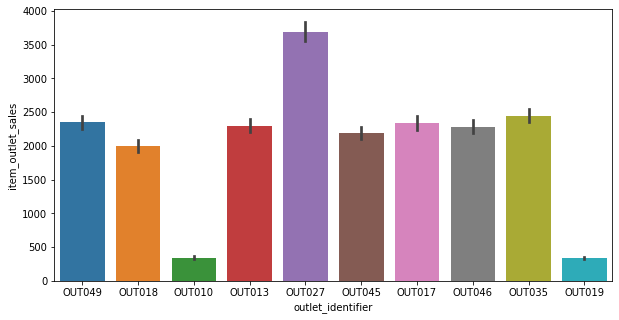

In [ ]:
#understanding outlet_identifier depending on item_outlet_sales
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.barplot(data = data, x = "outlet_identifier", y= "item_outlet_sales")

Text(0, 0.5, 'Mean of Item outlet sales')

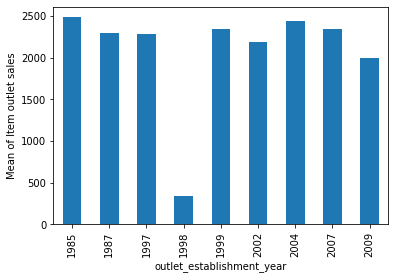

In [ ]:
#Understanding to ultet_establishment per year with respective to mean of each respective year item outlet sales
data.groupby("outlet_establishment_year")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

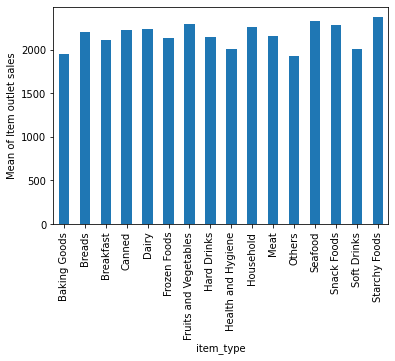

In [ ]:
#Understanding to item_type per year with respective to mean of each respective year item outlet sales
data.groupby("item_type")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

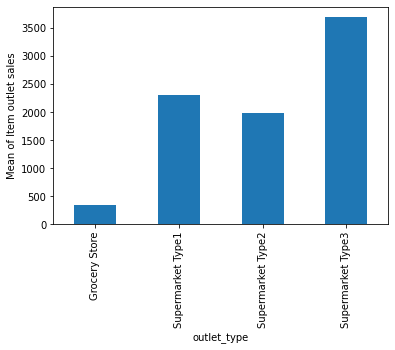

In [ ]:
#Understanding to outlet_type per year with respective to mean of each respective year item outlet sales
data.groupby("outlet_type")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

In [ ]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Replacing The Categorical Values**

In [ ]:
cols = ['item_identifier', 'item_fat_content',
       'item_type', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type']

In [ ]:
#MAPPING EACH CATEGORICAL COLUMN WITH RESPECTIVE FREQUENCY OF THE VALUES IN THE COLUMNS
for i in cols:
    x  = data[i].value_counts().to_dict()
    data[i] = data[i].map(x)

In [ ]:
#COPYING DATA 
new_data= data.copy()

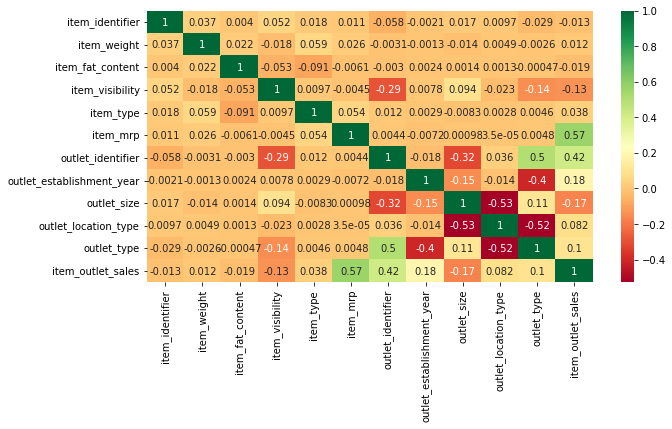

In [ ]:
#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize = (10,5))
sns.heatmap(new_data.corr(), cmap = "RdYlGn", annot = True)

In [ ]:
#REMOVING LESS CORRELATED COLUMNS 
new_data =new_data.drop(["item_weight","item_identifier", "item_type", "item_fat_content","outlet_location_type"], axis = 1)

In [ ]:
new_data.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
0,0.016047,249.8092,930,930,2793,5577,3735.1380
1,0.019278,48.2692,928,928,2793,928,443.4228
2,0.016760,141.6180,930,930,2793,5577,2097.2700
3,0.015274,182.0950,555,555,4798,1083,732.3800
4,0.008082,53.8614,932,932,932,5577,994.7052


In [ ]:
#CALCULATING THE SKEWNESS OF THE DATA
new_data.skew()

item_visibility              1.233294
item_mrp                     0.127202
outlet_identifier           -2.244651
outlet_establishment_year    0.936439
outlet_size                 -0.803018
outlet_type                 -0.650418
item_outlet_sales            1.177531
dtype: float64

**Visualizing the skewness**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

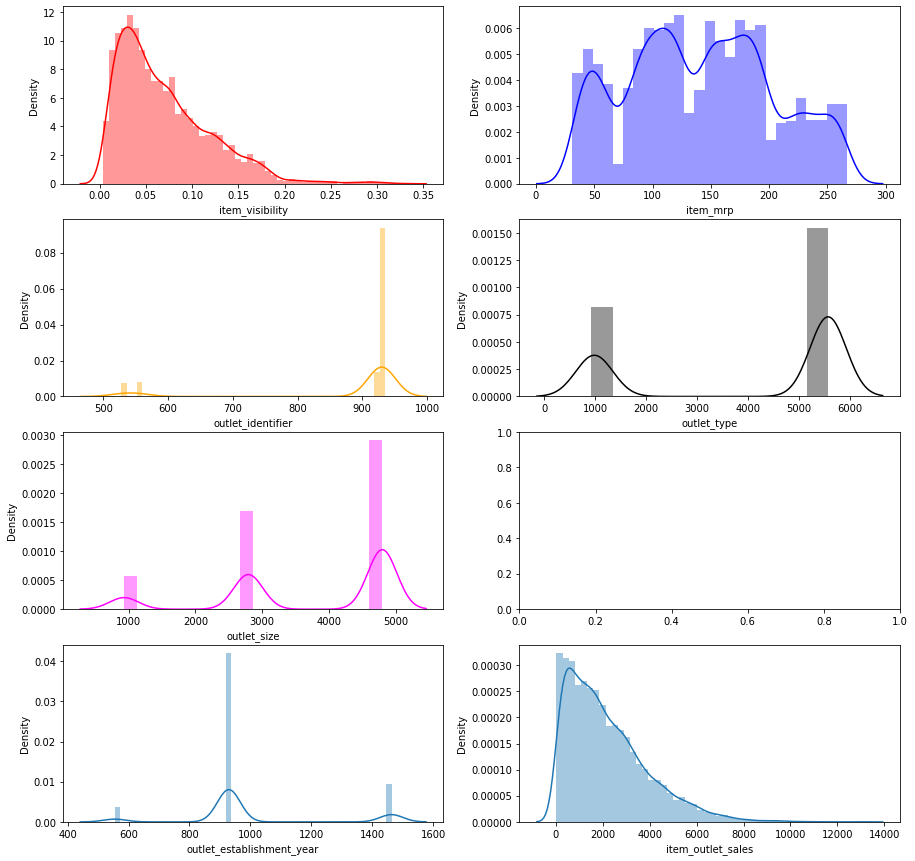

In [ ]:
# Before Transformation
fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.distplot(new_data["item_visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_data["item_mrp"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_data["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_data["outlet_type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_data["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(new_data["outlet_establishment_year"], kde =True, ax=ax[3,0])
sns.distplot(new_data["item_outlet_sales"], kde =True, ax=ax[3,1])

In [ ]:
new_data.columns

Index(['item_visibility', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_type',
       'item_outlet_sales'],
      dtype='object')

The visualization of the plot is clearly showing that many columns are not following the normal distribution and not properly scaled. Now, we will applying "Logarithmic" Transformationto make it scale and reduce the skewness of dataset.

In [ ]:
for i in new_data.columns:
    new_data[i] =np.log(new_data[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

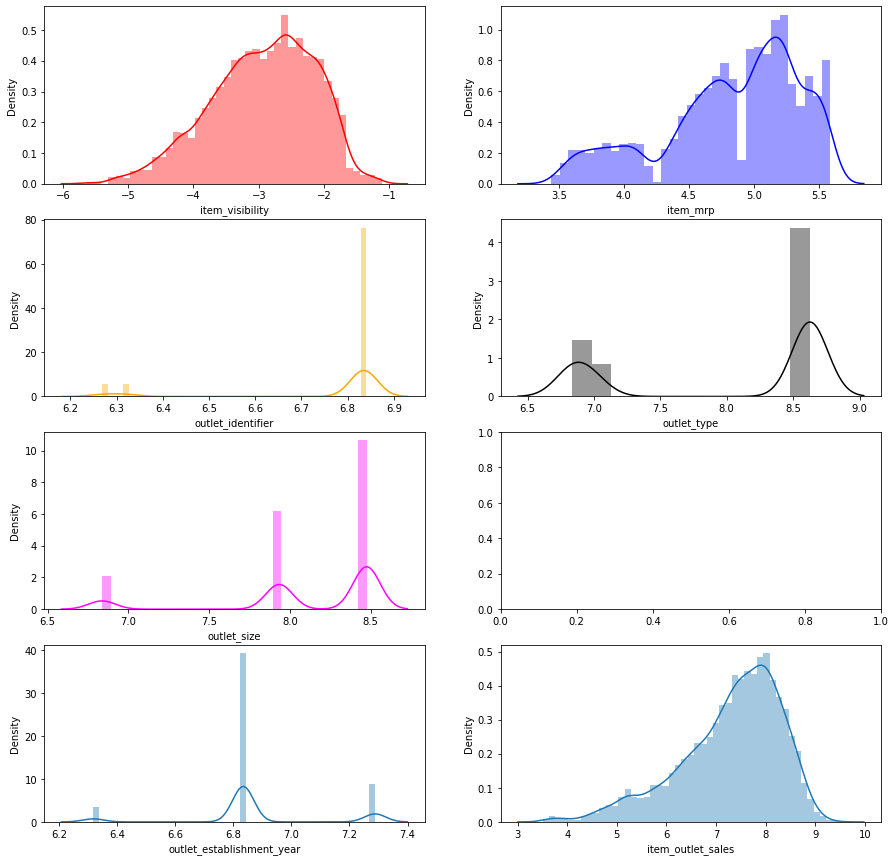

In [ ]:
# After Transformation
fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.distplot(new_data["item_visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_data["item_mrp"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_data["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_data["outlet_type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_data["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(new_data["outlet_establishment_year"], kde =True, ax=ax[3,0])
sns.distplot(new_data["item_outlet_sales"], kde =True, ax=ax[3,1])

In [ ]:
new_data.skew()

item_visibility             -0.429840
item_mrp                    -0.735795
outlet_identifier           -2.249965
outlet_establishment_year    0.026025
outlet_size                 -1.539875
outlet_type                 -0.657515
item_outlet_sales           -0.887753
dtype: float64

# **Training And Selecting Machine Learning Models**

In [ ]:
#Independent Variables:
x = new_data.drop("item_outlet_sales", axis = 1) 

#Depenedent Variables 
y = new_data["item_outlet_sales"].values.reshape(-1,1)

Splitting the data into Training data & Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

# **XGBoost Regressor**

In [ ]:
#Applying Linear Regression Model
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_train, y_train)
# prediction on training data
training_data_prediction = regressor.predict(x_train)

[18:10:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# R squared Value
import sklearn.metrics as metrics
r2_train = metrics.r2_score(y_train, training_data_prediction)
r2_train

0.7479842414122115

**From XGBoost Regressor On Training Data**
1. R2_SCORE = 74.79%


In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(x_test)

In [ ]:
# R squared Value
r2_test = metrics.r2_score(y_test, test_data_prediction)
r2_test

0.7670334463746935

**From XGBoost Regressor On Testing Data**
1. R2_SCORE = 76.70%

# **Linear Regression**

In [ ]:
#Applying Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Prediction
y_pred = regressor.predict(x_test)

In [ ]:
#Accuracy of Model (Apply R2_score)
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.7570281460077115

In [ ]:
#Checking Root Mean Square error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test,  y_pred))
rmse

0.5197787447163864



**Linear Regression Result**
1. R2_SCORE = 75.70%
2. RMSE = 0.519



In [ ]:
#Residue of the Linear Regression Model 
residue_lr = y_test -y_pred

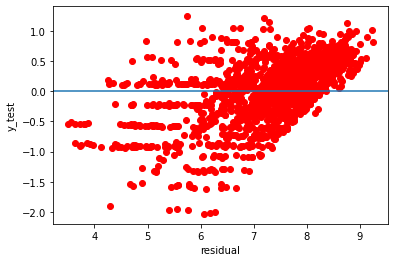

In [ ]:
#Plotting Residual Plot
plt.scatter(y_test,residue_lr, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

# **Regularization:**
Trying to adjust loss function and prevent overfitting or underfitting

**1. RIDGE Regression:**

In [ ]:
#Ridge Regression
from sklearn import linear_model
rr = linear_model.Ridge(alpha = 0.009)
rr.fit(x_train, y_train)

Ridge(alpha=0.009)

In [ ]:
#Prediction AFTER Ridge regression
rr_pred = rr.predict(x_test)

In [ ]:
#Accuracy score check
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.7570281460077115

In [ ]:
#RMSE
rmse_ridge = sqrt(mean_squared_error(y_test, rr_pred))
rmse_ridge

0.5197810776520828

**From RIDGE Regression**
1. R2_SCORE = 75.57%
2. RMSE = 0.519

In [ ]:
#residue after ridge
residue_rr = y_test-rr_pred\



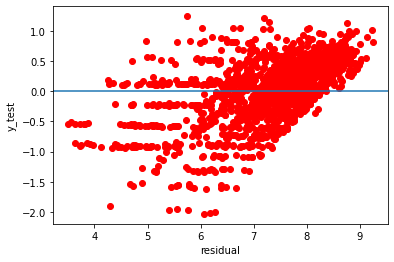

In [ ]:
#plotting of residual graph after RIDGE REGRESSION
plt.scatter(y_test,residue_rr, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

**2. LASSO Regression:**

In [ ]:
#Importing LASSO AND RIDGE from sklearn library:
#Apply Lasso Regularization Technique
from sklearn.linear_model import Lasso, Ridge
ls = Lasso(alpha = 0.009)
ls.fit(x_train, y_train)

Lasso(alpha=0.009)

In [ ]:
#prediction by LASSO model
ls_pred = ls.predict(x_test)


In [ ]:
#Accuracy After Lasso(by R2_score)
r2_score(y_test,ls_pred)


0.7468491769184082

In [ ]:
#Root Mean Square Error
rmse_lasso = sqrt(mean_squared_error(y_test, ls_pred))
rmse_lasso

0.530554746291775

**From LASSO Regression**
1.   R2_SCORE= 74.68%
2.   RMSE = 0.53

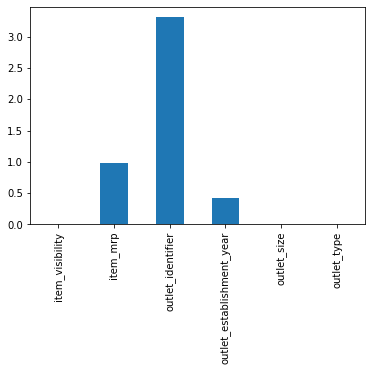

In [ ]:
#Getting Lasso Coefficent
lasso_coeff = pd.Series(ls.coef_, index =x.columns) 
#Visualization of Coefficent after LASSO 
lasso_coeff.plot(kind = "bar")

In [ ]:
#RESHAPING THE PREDICTED VALUES
ls_pred= ls_pred.reshape(-1,1)

ls_pred

array([[7.86649549],
       [7.45465459],
       [6.52762899],
       ...,
       [7.92350261],
       [7.03867668],
       [6.64322991]])

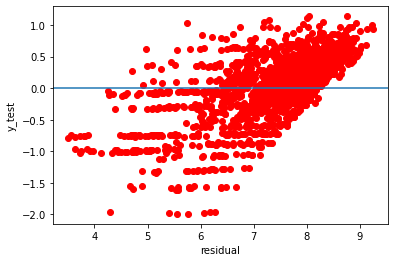

In [ ]:
#RESIDUE VALUE AFTER LASSO REGRESSION
residue = y_test - ls_pred
plt.scatter(y_test.reshape(-1,1),residue, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)